In [1]:
import numpy as np
import pandas as pd

from util.directed_graph import DirectedGraph
from util.read_pairs_data import read_pairs_data
from util.graph_vis import GraphVisualization
from greedy_n_way_exchange import GreedyNWayExchange

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pairs_filename = "../data/100/100_28_pairs.txt"

In [3]:
pairs = read_pairs_data(pairs_filename)
pairs.head()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
0,P2800,O,O,10
1,P2801,O,A,90
2,P2802,A,O,5
3,P2803,O,A,5
4,P2804,AB,O,28


In [4]:
pairs.tail()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
94,P2894,O,O,90
95,P2895,O,O,28
96,P2896,B,O,10
97,P2897,B,A,5
98,P2898,A,O,28


In [5]:
grph = DirectedGraph(pairs.head(15))

In [6]:
grph.adjacency

{'P2800': ['P2801',
  'P2802',
  'P2803',
  'P2804',
  'P2805',
  'P2806',
  'P2807',
  'P2808',
  'P2810',
  'P2811',
  'P2812',
  'P2813',
  'P2814'],
 'P2801': ['P2800',
  'P2802',
  'P2803',
  'P2804',
  'P2805',
  'P2806',
  'P2807',
  'P2808',
  'P2810',
  'P2811',
  'P2812',
  'P2813',
  'P2814'],
 'P2802': ['P2801', 'P2803', 'P2807', 'P2808'],
 'P2803': ['P2800',
  'P2801',
  'P2802',
  'P2804',
  'P2805',
  'P2806',
  'P2807',
  'P2808',
  'P2810',
  'P2811',
  'P2812',
  'P2813',
  'P2814'],
 'P2805': ['P2801', 'P2803', 'P2807', 'P2808'],
 'P2806': ['P2812'],
 'P2807': ['P2800',
  'P2801',
  'P2802',
  'P2803',
  'P2804',
  'P2805',
  'P2806',
  'P2808',
  'P2810',
  'P2811',
  'P2812',
  'P2813',
  'P2814'],
 'P2808': ['P2800',
  'P2801',
  'P2802',
  'P2803',
  'P2804',
  'P2805',
  'P2806',
  'P2807',
  'P2810',
  'P2811',
  'P2812',
  'P2813',
  'P2814'],
 'P2809': ['P2801', 'P2803', 'P2807', 'P2808'],
 'P2812': ['P2801', 'P2803', 'P2807', 'P2808'],
 'P2813': ['P2800',
  

In [7]:
edges = []

for donor_idx in grph.adjacency:
    for recipient_idx in grph.adjacency[donor_idx]:
        edges.append([donor_idx, recipient_idx])

In [8]:
gv = GraphVisualization()

for from_, to_ in edges[:15]:
    gv.add_edge(from_, to_)

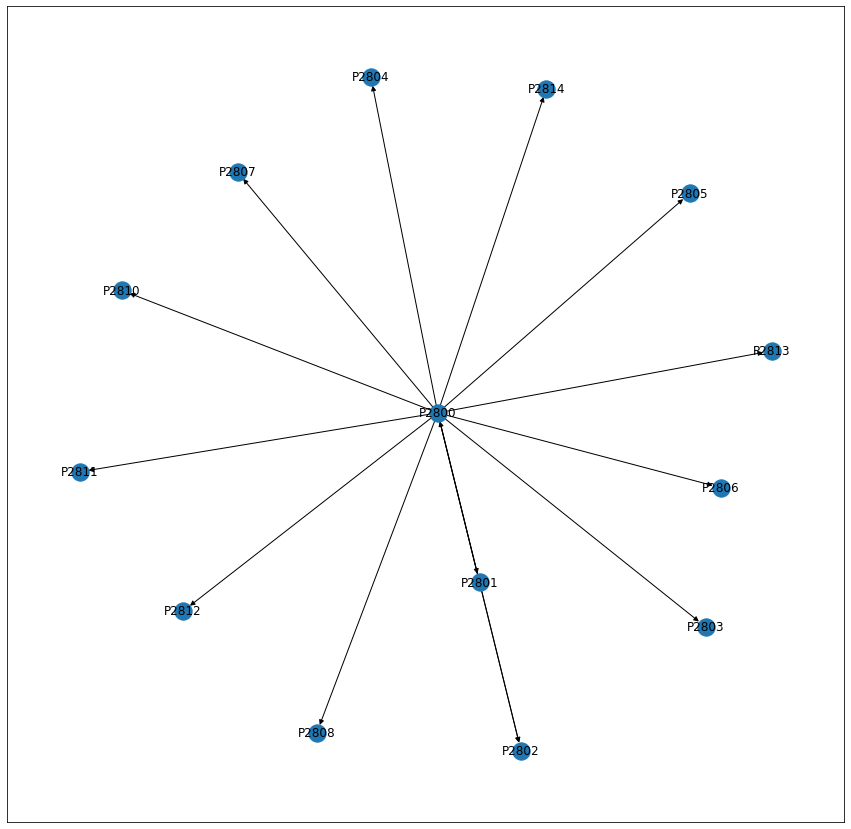

In [9]:
plt.figure(figsize=(15, 15))
gv.visualize()

In [10]:
cycles = grph.get_cycles()

In [11]:
cycles

[['P2800', 'P2801'],
 ['P2800', 'P2801', 'P2802', 'P2803'],
 ['P2800', 'P2801', 'P2802', 'P2803', 'P2805', 'P2807'],
 ['P2800',
  'P2801',
  'P2802',
  'P2803',
  'P2805',
  'P2807',
  'P2806',
  'P2812',
  'P2808'],
 ['P2800',
  'P2801',
  'P2802',
  'P2803',
  'P2805',
  'P2807',
  'P2806',
  'P2812',
  'P2808',
  'P2813'],
 ['P2800', 'P2801', 'P2802', 'P2803', 'P2805', 'P2807', 'P2808'],
 ['P2800', 'P2801', 'P2802', 'P2803', 'P2805', 'P2807', 'P2808', 'P2813'],
 ['P2800', 'P2801', 'P2802', 'P2803', 'P2805', 'P2807', 'P2812', 'P2808'],
 ['P2800',
  'P2801',
  'P2802',
  'P2803',
  'P2805',
  'P2807',
  'P2812',
  'P2808',
  'P2813'],
 ['P2800', 'P2801', 'P2802', 'P2803', 'P2805', 'P2807', 'P2813'],
 ['P2800',
  'P2801',
  'P2802',
  'P2803',
  'P2805',
  'P2807',
  'P2813',
  'P2806',
  'P2812',
  'P2808'],
 ['P2800', 'P2801', 'P2802', 'P2803', 'P2805', 'P2807', 'P2813', 'P2808'],
 ['P2800',
  'P2801',
  'P2802',
  'P2803',
  'P2805',
  'P2807',
  'P2813',
  'P2812',
  'P2808'],
 ['P

In [12]:
gnway = GreedyNWayExchange(10, 'maximum')

In [13]:
gnway.finalize_exchange(grph)

In [14]:
gnway.show_donation_mapping('text')

P2800 --> P2801
P2802 --> P2803
P2805 --> P2807
P2806 --> P2812 --> P2808


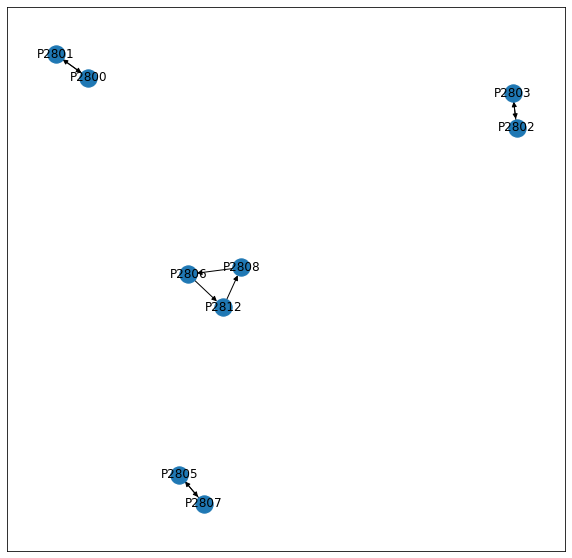

In [15]:
plt.figure(figsize=(10, 10))
gnway.show_donation_mapping('graph')

In [16]:
gnway.get_num_of_matched_pairs()    

9